In [6]:
#Zad1
import pandas as pd
import requests

#Pobieranie danych jako listy słowników
def pobieranie_danych(start_date, end_date, currency):
    request_url = 'http://api.nbp.pl/api/exchangerates/rates/A/' + currency + '/' + start_date + '/' + end_date + '/'
    currency_req = requests.get(request_url)
    currency_data = currency_req.json()
    return currency_data['rates'] 

#Wykorzystanie powyższej funkcji do pobrania danych jako dataframe
def pobieranie_danych_jako_dataframe(start_date, end_date, currency):
    currency_data = pobieranie_danych(start_date, end_date, currency)
    return pd.DataFrame.from_dict(currency_data)

#przykład użycia funkcji
#USD = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-31', 'USD')
#print(pobieranie_danych_jako_dataframe('2019-10-01', '2019-09-31', 'CHF'))

In [7]:
#Zad2
#pobieranie danych o dolarze amerykanśkim z października
usd = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-31', 'USD')
#pobieranie danych o franku szwajcarskim z października
chf = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-31', 'CHF')

In [8]:
#Zad3
import pandas as pd

#USD

print("Podglądamy zawartość DataFrame")
print(usd.head()) #podgląd zawartości dataframe
print("Sprawdzamy typ danych")
print(usd.dtypes) #sprawdzanie typu pobranych danych
print("Zmieniamy typ object na datatime")
usd['effectiveDate'] = pd.to_datetime(usd['effectiveDate']) #zmiana typu danych kolumny z datą na typ datatime
print("Sprawdzamy nowy typ danych kolumny z datami")
print(usd['effectiveDate'].dtypes) #sprawdzenie typu danych kolumny z datą po zmianie
usd = usd.set_index("effectiveDate").drop(columns='no') #zmiana indeksu na datę i usunięcie kolumny "no"
print(usd.head())

#CHF

print("Podglądamy zawartość DataFrame")
print(chf.head()) #podgląd zawartości dataframe
print("Sprawdzamy typ danych")
print(chf.dtypes) #sprawdzanie typu pobranych danych
print("Zmieniamy typ object na datatime")
chf['effectiveDate'] = pd.to_datetime(chf['effectiveDate']) #zmiana typu danych kolumny z datą na typ datatime
print("Sprawdzamy nowy typ danych kolumny z datami")
print(chf['effectiveDate'].dtypes) #sprawdzenie typu danych kolumny z datą po zmianie
chf = chf.set_index("effectiveDate").drop(columns='no') #zmiana indeksu na datę i usunięcie kolumny "no"
print(chf.head())

Podglądamy zawartość DataFrame
               no effectiveDate     mid
0  190/A/NBP/2019    2019-10-01  4.0147
1  191/A/NBP/2019    2019-10-02  4.0152
2  192/A/NBP/2019    2019-10-03  3.9652
3  193/A/NBP/2019    2019-10-04  3.9469
4  194/A/NBP/2019    2019-10-07  3.9498
Sprawdzamy typ danych
no                object
effectiveDate     object
mid              float64
dtype: object
Zmieniamy typ object na datatime
Sprawdzamy nowy typ danych kolumny z datami
datetime64[ns]
                  mid
effectiveDate        
2019-10-01     4.0147
2019-10-02     4.0152
2019-10-03     3.9652
2019-10-04     3.9469
2019-10-07     3.9498
Podglądamy zawartość DataFrame
               no effectiveDate     mid
0  190/A/NBP/2019    2019-10-01  4.0116
1  191/A/NBP/2019    2019-10-02  4.0167
2  192/A/NBP/2019    2019-10-03  3.9694
3  193/A/NBP/2019    2019-10-04  3.9588
4  194/A/NBP/2019    2019-10-07  3.9727
Sprawdzamy typ danych
no                object
effectiveDate     object
mid              float64
dtyp

In [9]:
#zad 4
from numpy import corrcoef, array

usd = pobieranie_danych('2019-10-01', '2019-10-31', 'USD')  
chf = pobieranie_danych('2019-10-01', '2019-10-31', 'CHF')  

#generowanie listy wartości waluty względem złotego 
usd2 = []
for tmp in usd:
    usd2.append(tmp['mid'])

chf2 = []
for tmp in chf:
    chf2.append(tmp['mid'])

# alternatywne generowanie: chf2 = [tmp['mid'] for tmp in chf]

#tworzenie tablicy korelacji
corrcoef(array(usd2), array(chf2))



array([[1.        , 0.96867693],
       [0.96867693, 1.        ]])

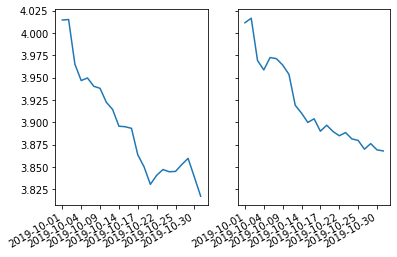

In [10]:
#Zad5
import matplotlib.pyplot as plt

dane_wykres_usd = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-31', 'USD').set_index(['effectiveDate'])['mid']
dane_wykres_chf = pobieranie_danych_jako_dataframe('2019-10-01', '2019-10-31', 'CHF').set_index(['effectiveDate'])['mid']


fig, axs = plt.subplots(1,2, sharex=True, sharey=True) 
axs[0].plot(dane_wykres_usd) #przypisanie pobranych danych USD do wykresu pierwszego
axs[1].plot(dane_wykres_chf) #przypisanie pobranych danych CHF do wykresu drugiego


#poniższe 3 polecenie zwiekszają czytelność wykresów
fig.autofmt_xdate() #ustawienie opisów osi x pod kontem 45 stopni
tmp_x=9 #określenie ilości wyświetlanych dat na osi x
axs[0].xaxis.set_major_locator(plt.MaxNLocator(tmp_x)) #ograniczenie wyświetlanych wartości dat na osi x do wcześniej zadeklarowanej ilości
#wystarczy to zrobić dla jednego wykresu bo wartości są współdzielone dzięki funkcji plt.subplots

plt.show()